# 6.6. Sourcing & Analyzing Time-Series Data

### The list of the Content
    1. Importing Libraries & Data
    2. Data Wrangling & Subsetting
    3. Time Series Analysis: Decomposition
    4. Testing for Stationarity
    5. Stationarizing the Data

## 1. Importing Libraries & Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\praha\OneDrive\Documents\Python\04-2023 World University Rankings\02. Data'

In [4]:
# import data
df = pd.read_csv(os.path.join(path, 'Original Data', 'completed_university_data.csv'))

In [5]:
df.head(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


## 2. Data Wrangling & Subsetting

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [7]:
# Change Data types for 'year' column
df['year'] = df['year'].astype('str')
df['num_students'] = df['num_students'].fillna('0').astype(str).str.replace(',', '').astype(int)

In [30]:
#Subset data from column 'year' and 'num_students'
df_2 = df.groupby('year').agg({'num_students':'mean'})

In [35]:
df_2.head(6)

,num_students
year,
2011,23442.890000
2012,22933.805970
2013,23148.707500
2014,22971.157500
2015,22990.137157
2016,23949.853750


In [10]:
df_2['num_students'] = df_2['num_students'].astype(int)

In [33]:
df_2.head(6)

,num_students
year,
2011,23442.890000
2012,22933.805970
2013,23148.707500
2014,22971.157500
2015,22990.137157
2016,23949.853750


#### Discussion: 
Subsetting of the data is carried out in the column 'year' and the average 'num_students' to determine fluctuations in the average number of students in all universities each year.

## 3. Time-series analysis: decomposition

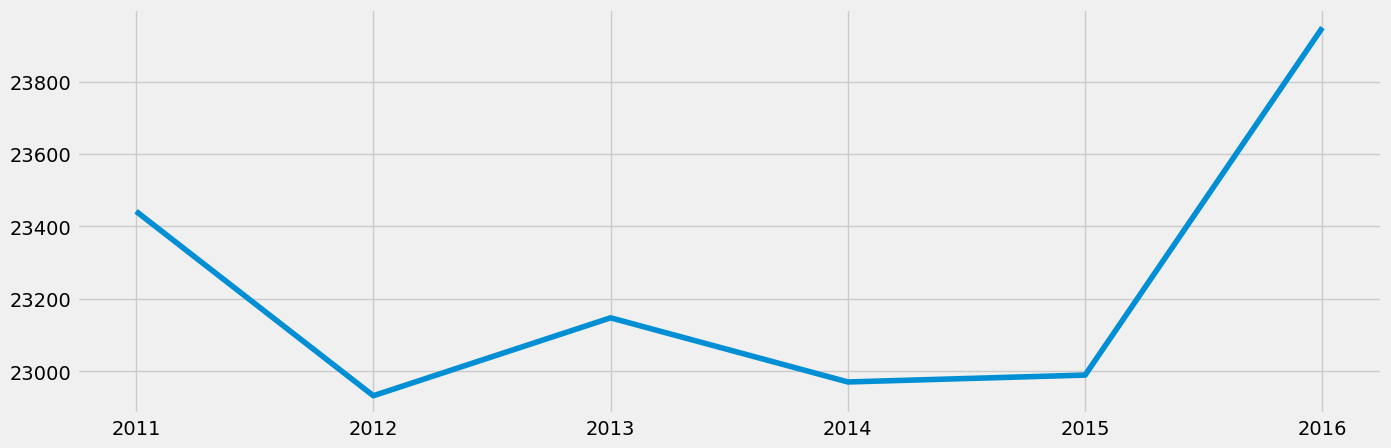

In [12]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_2)


In [13]:
# Check for missing values (you shouldn't have any)

df_2.isnull().sum() 

num_students    0
dtype: int64

In [14]:
# Decompose the time series using an additive model

df_2.index = pd.date_range(start='01-01-2011', end='12-31-2016', freq='A')
decomposition = sm.tsa.seasonal_decompose(df_2, model='additive')

In [15]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

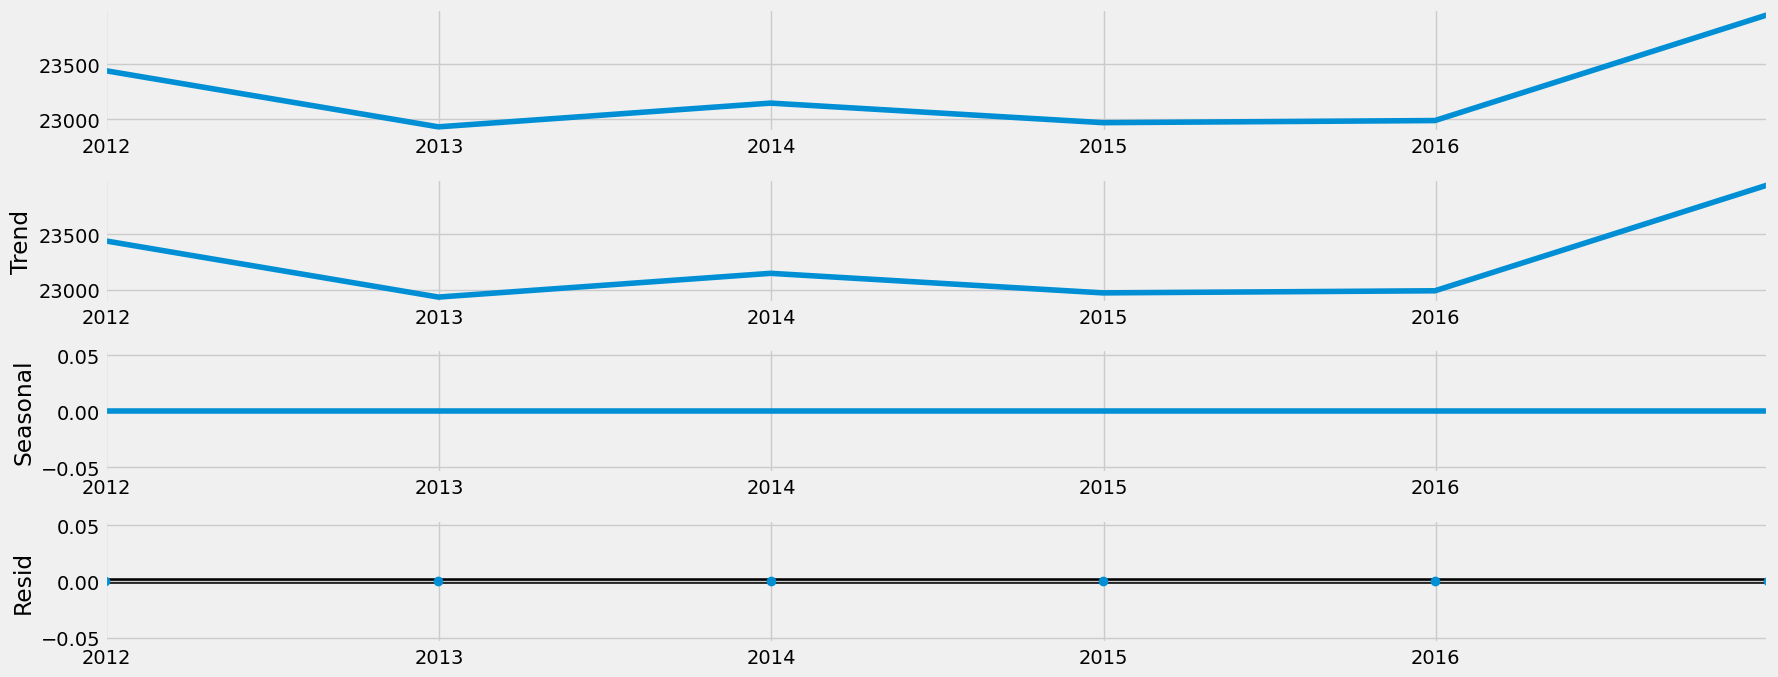

In [16]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Discussion: 
After decomposing your time series data, we found a trend component but no seasonality or noise, meaning the data changes systematically over time. Still, there are no regular fluctuations or random fluctuations.

## 4. Testing for stationarity

In [17]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_2['num_students'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.308087
p-value                        0.625465
Number of Lags Used            1.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


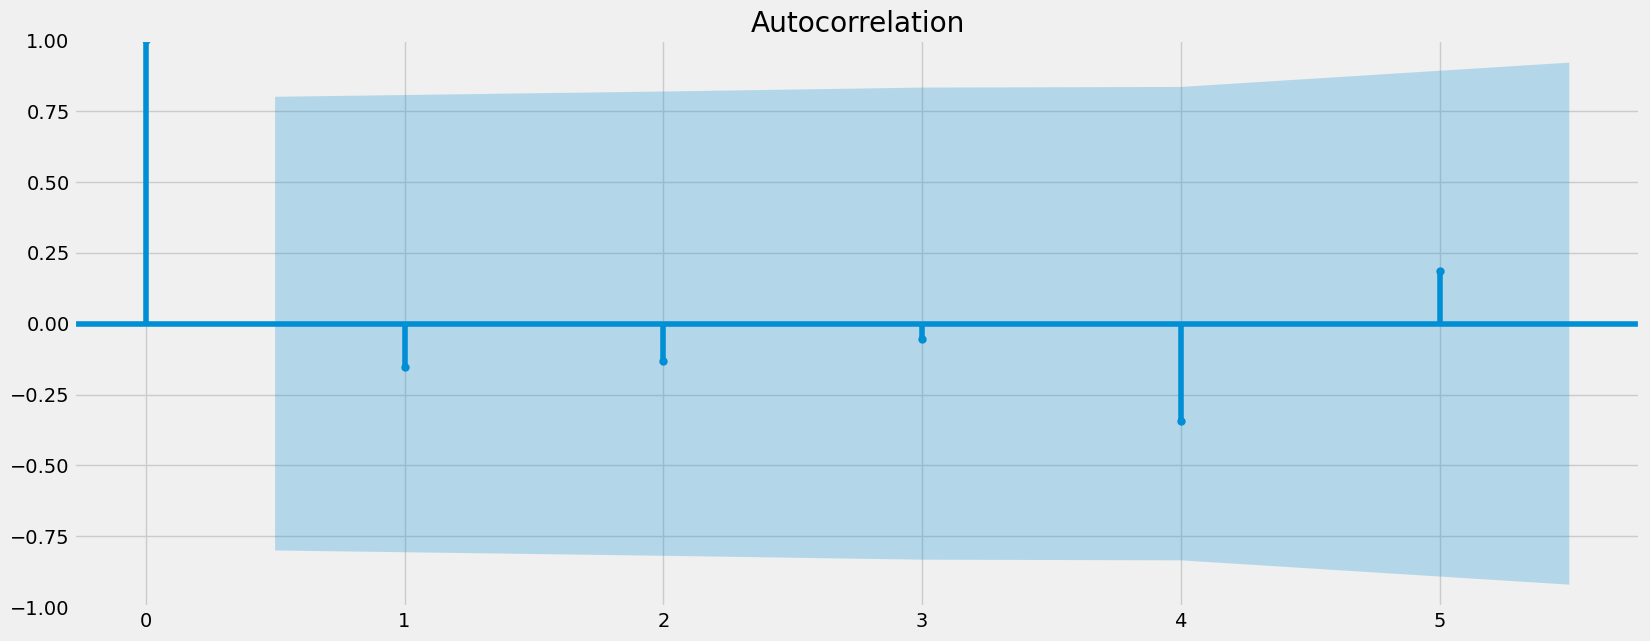

In [18]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_2)
plt.show()

#### Discusssion
In the output, the Dickey-Fuller test statistic is -1.308087, more significant than the critical values at all significance levels. Additionally, the p-value is 0.625465, greater than the significance level of 0.05. Therefore, we cannot reject the null hypothesis that the time series is non-stationary. It means that the statistical properties of the data are changing over time, and the data could be more consistent and predictable.

## 5. Stationarizing the Data

In [19]:
df_diff = df_2 - df_2.shift(1) # The df_2.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [20]:
df_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [21]:
df_diff.head()

,num_students
2012-12-31,-509.0
2013-12-31,215.0
2014-12-31,-177.0
2015-12-31,19.0
2016-12-31,959.0


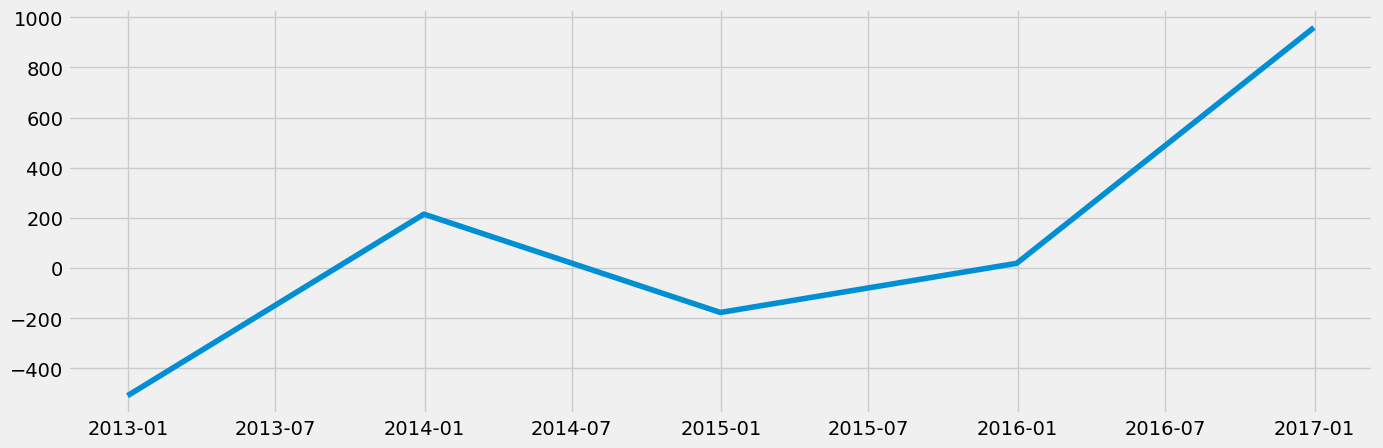

In [22]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [23]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -0.934864
p-value                        0.776275
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


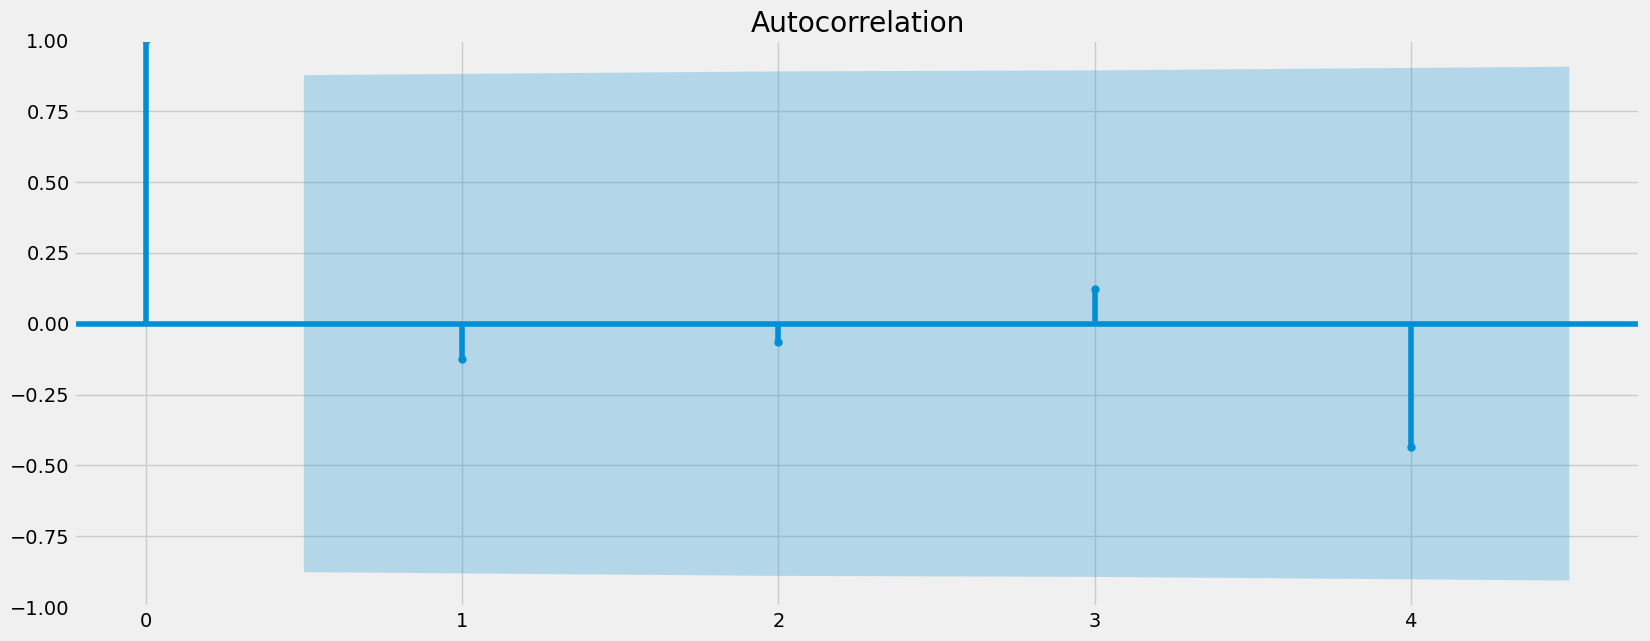

In [24]:
plot_acf(df_diff)
plt.show()

#### Discussion: 
The test statistic for the Dickey-Fuller test is -0.934864, and the p-value is 0.776275. The number of lags used in the test is 0, and the number of observations used is 4. The critical values at the 1%, 5%, and 10% levels are -7.355441, -4.474365, and -3.126933, respectively. The test statistic is more significant than all three critical values, which indicates that we cannot reject the null hypothesis that the data is non-stationary.

In [25]:
df_diff2 = df_diff - df_diff.shift(1)

In [26]:
df_diff2.dropna(inplace = True)

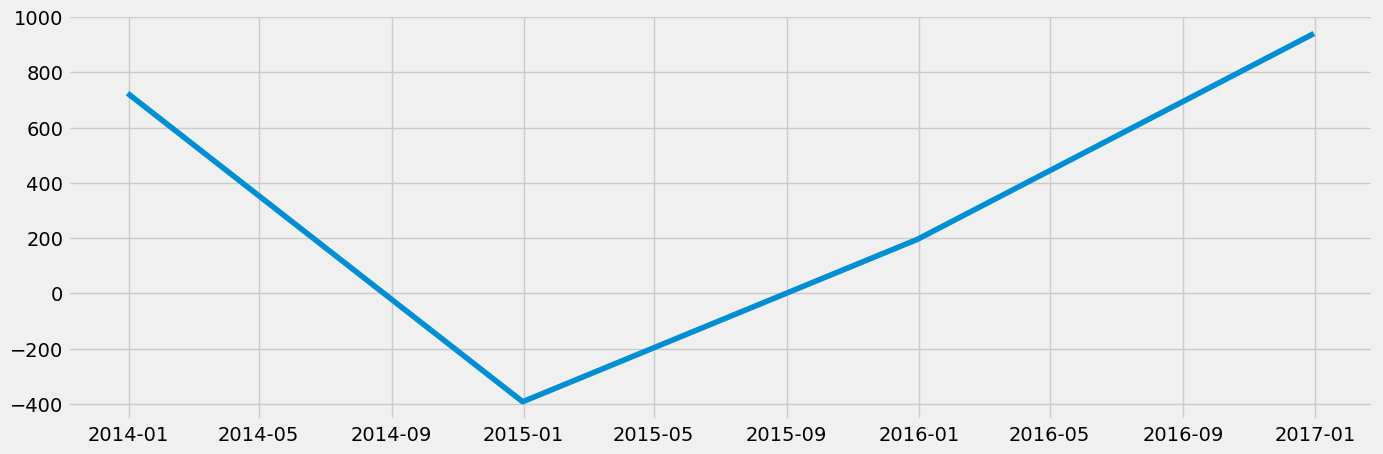

In [27]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff2)

In [28]:
dickey_fuller(df_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.370668
p-value                         0.596255
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


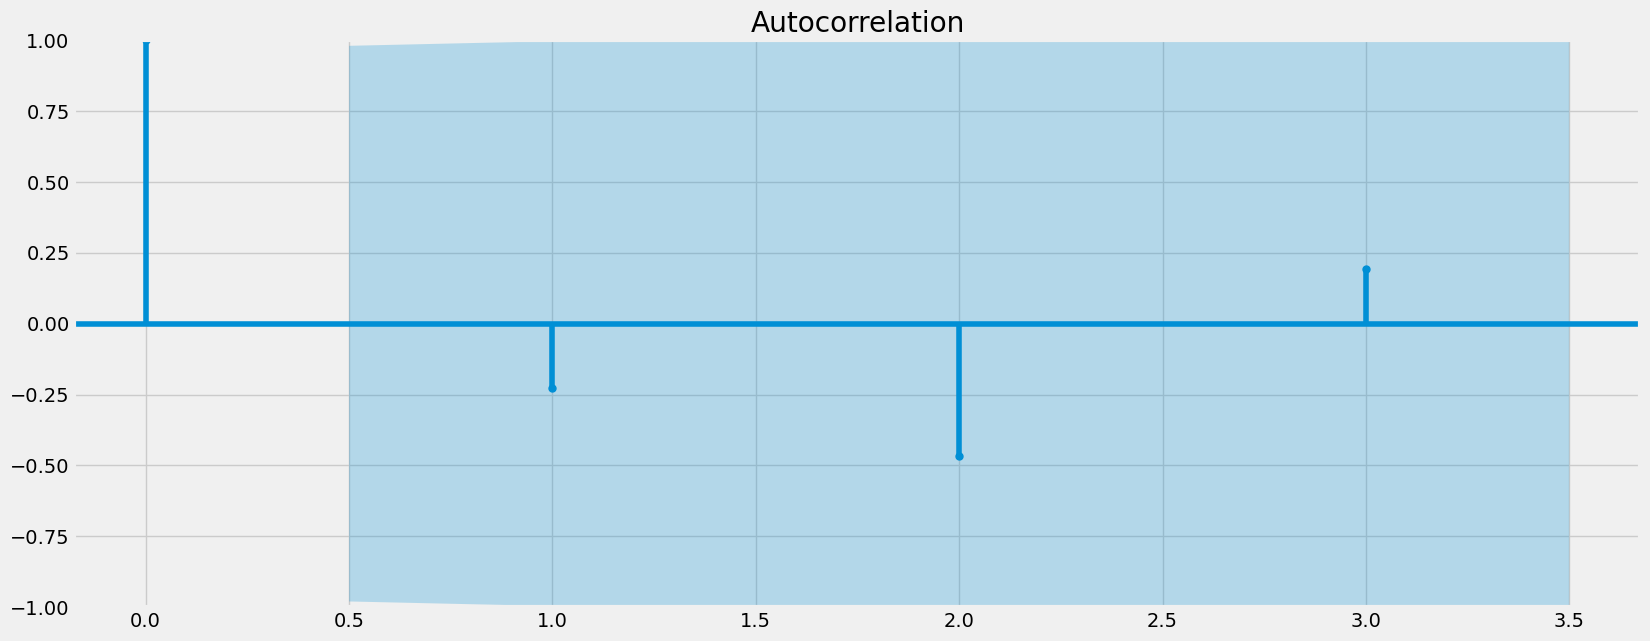

In [29]:
plot_acf(df_diff2)
plt.show()

#### Discussion: 
The test statistic for the Dickey-Fuller test is -1.370668, and the p-value is 0.596255. The number of lags used in the test is 0, and the number of observations used is 3. The critical values at the 1%, 5%, and 10% levels are -10.417191, -5.778381, and -3.391681, respectively. The test statistic is greater than all three critical values, which indicates that we cannot reject the null hypothesis that the data is non-stationary.